In [6]:
import colour
import color_correction
import numpy as np
import os
import cv2
import imageio
import matplotlib.pyplot as plt
from tqdm import trange

In [7]:
path = r"C:\Users\ecoplants\Desktop"
file = r"T_20220908_Albedo_2K.png"

uint16


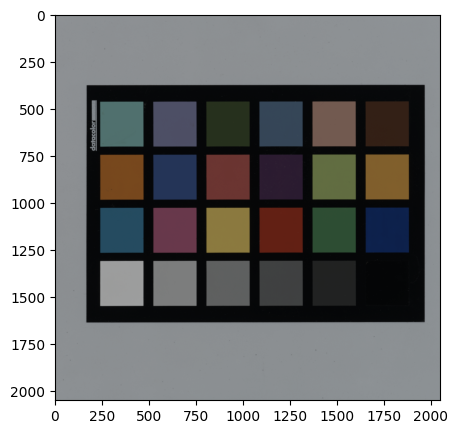

In [8]:
img = cv2.imdecode(np.fromfile(os.path.join(path,file),dtype=np.uint8),-1)
print(img.dtype)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 65535

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

img = colour.cctf_decoding(img)

  1%|▏         | 1/80 [00:00<00:54,  1.44it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  2%|▎         | 2/80 [00:01<00:53,  1.47it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  4%|▍         | 3/80 [00:02<00:51,  1.51it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  5%|▌         | 4/80 [00:02<00:50,  1.52it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  6%|▋         | 5/80 [00:03<00:48,  1.54it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  8%|▊         | 6/80 [00:03<00:47,  1.56it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


  9%|▉         | 7/80 [00:04<00:47,  1.55it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 10%|█         | 8/80 [00:05<00:45,  1.57it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 11%|█▏        | 9/80 [00:05<00:45,  1.56it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 12%|█▎        | 10/80 [00:06<00:44,  1.57it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 14%|█▍        | 11/80 [00:07<00:44,  1.56it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 15%|█▌        | 12/80 [00:07<00:43,  1.55it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 16%|█▋        | 13/80 [00:08<00:42,  1.57it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 18%|█▊        | 14/80 [00:09<00:41,  1.58it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 19%|█▉        | 15/80 [00:09<00:40,  1.60it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 20%|██        | 16/80 [00:10<00:40,  1.59it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 21%|██▏       | 17/80 [00:10<00:39,  1.60it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 22%|██▎       | 18/80 [00:11<00:38,  1.61it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 24%|██▍       | 19/80 [00:12<00:37,  1.61it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 25%|██▌       | 20/80 [00:12<00:37,  1.61it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 26%|██▋       | 21/80 [00:13<00:36,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 28%|██▊       | 22/80 [00:13<00:35,  1.63it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 29%|██▉       | 23/80 [00:14<00:35,  1.61it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 30%|███       | 24/80 [00:15<00:34,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 31%|███▏      | 25/80 [00:15<00:34,  1.60it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 32%|███▎      | 26/80 [00:16<00:33,  1.60it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 34%|███▍      | 27/80 [00:17<00:32,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 35%|███▌      | 28/80 [00:17<00:32,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 36%|███▋      | 29/80 [00:18<00:31,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 38%|███▊      | 30/80 [00:18<00:30,  1.62it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 39%|███▉      | 31/80 [00:19<00:29,  1.64it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 40%|████      | 32/80 [00:20<00:28,  1.66it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 41%|████▏     | 33/80 [00:20<00:28,  1.65it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 42%|████▎     | 34/80 [00:21<00:27,  1.66it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 44%|████▍     | 35/80 [00:21<00:26,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 45%|████▌     | 36/80 [00:22<00:26,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 46%|████▋     | 37/80 [00:23<00:25,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 48%|████▊     | 38/80 [00:23<00:25,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 49%|████▉     | 39/80 [00:24<00:24,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 50%|█████     | 40/80 [00:24<00:23,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 51%|█████▏    | 41/80 [00:25<00:23,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 52%|█████▎    | 42/80 [00:26<00:22,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 54%|█████▍    | 43/80 [00:26<00:22,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 55%|█████▌    | 44/80 [00:27<00:21,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 56%|█████▋    | 45/80 [00:27<00:20,  1.67it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 57%|█████▊    | 46/80 [00:28<00:20,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 59%|█████▉    | 47/80 [00:29<00:19,  1.68it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 60%|██████    | 48/80 [00:29<00:18,  1.69it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 61%|██████▏   | 49/80 [00:30<00:18,  1.70it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 62%|██████▎   | 50/80 [00:30<00:17,  1.71it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 64%|██████▍   | 51/80 [00:31<00:17,  1.71it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 65%|██████▌   | 52/80 [00:31<00:16,  1.71it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 66%|██████▋   | 53/80 [00:32<00:15,  1.70it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 68%|██████▊   | 54/80 [00:33<00:15,  1.70it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 69%|██████▉   | 55/80 [00:33<00:14,  1.71it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 70%|███████   | 56/80 [00:34<00:13,  1.72it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 71%|███████▏  | 57/80 [00:34<00:13,  1.72it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 72%|███████▎  | 58/80 [00:35<00:12,  1.73it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 74%|███████▍  | 59/80 [00:36<00:12,  1.73it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 75%|███████▌  | 60/80 [00:36<00:11,  1.73it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 76%|███████▋  | 61/80 [00:37<00:10,  1.74it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 78%|███████▊  | 62/80 [00:37<00:10,  1.72it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 79%|███████▉  | 63/80 [00:38<00:09,  1.72it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


 80%|████████  | 64/80 [00:38<00:09,  1.75it/s]

Found 0 swatches.
ERROR. Can't find or found multiple swatches.


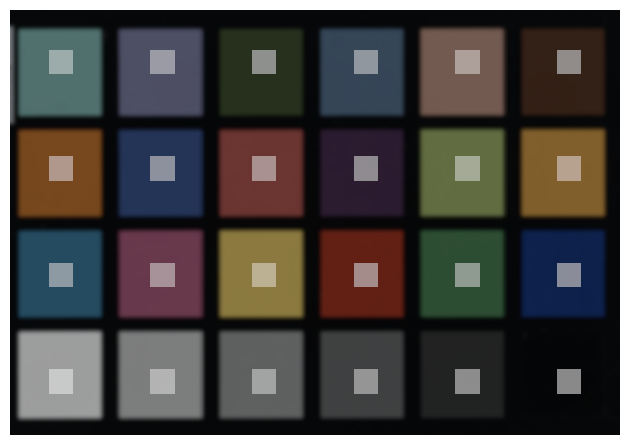

 80%|████████  | 64/80 [00:39<00:09,  1.61it/s]

Found 1 swatches.
Resize ratio:  0.36


In [9]:

for w in trange(80):
    img_resize = cv2.resize(img, (0, 0), fx = 1-w*0.01, fy = 1-w*0.01)
    swatch = color_correction.getColorCorrectionSwatches(img_resize, verbose = True)
    if swatch is not None:
        print("Resize ratio: ", 1-w*0.01)
        break


In [10]:
print(np.array(swatch))

[[ 0.08093168  0.16369458  0.15726861]
 [ 0.07536398  0.07823794  0.1304141 ]
 [ 0.02011302  0.03016881  0.01252789]
 [ 0.03655629  0.06133181  0.09611227]
 [ 0.16997245  0.10304283  0.08168445]
 [ 0.0334179   0.01454833  0.00807251]
 [ 0.18662623  0.06502578  0.01251605]
 [ 0.01815381  0.0347787   0.09574613]
 [ 0.14638394  0.03539115  0.03068126]
 [ 0.02493696  0.01165197  0.03016967]
 [ 0.12166658  0.15308517  0.0538315 ]
 [ 0.2186138   0.11481741  0.02557819]
 [ 0.01859918  0.07122901  0.1180683 ]
 [ 0.13861042  0.04040596  0.07113482]
 [ 0.25934175  0.19407229  0.0501697 ]
 [ 0.12312032  0.01493745  0.00719351]
 [ 0.0271202   0.07541469  0.03389416]
 [ 0.00414742  0.01537128  0.07141928]
 [ 0.3330258   0.33660316  0.3355231 ]
 [ 0.20244986  0.2061923   0.206428  ]
 [ 0.11442444  0.11748975  0.11737785]
 [ 0.05082607  0.0526644   0.05299162]
 [ 0.01535975  0.01636874  0.01605193]
 [ 0.00144695  0.00175818  0.00203134]]
